## Question 1

/opt/conda/lib/python3.10/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


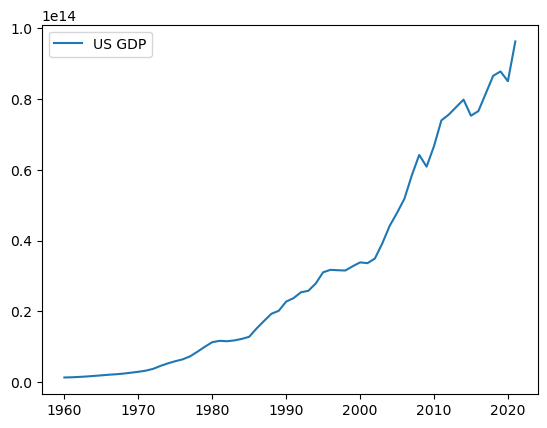

In [1]:
!pip install pandas-datareader
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD' , country='WLD' , start='1960' , end='2021')
time = np.arange(1960,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order , so reverse order
gdp = np.flip(gdp)
# Plot world GDP data against time
plt.plot(time , gdp , label='US GDP')
plt.legend()
plt.show()


GDPk = GDP0(1 + r)^k

To get a linear relationship we will apply logarithmic transformation to turn product into sums.

We will get the equation:

ln(GDPk) = ln(GDP0) + k * ln(1 + r)

This transformation is now linear logarithmic relation.


In [2]:
import pandas as pd
gdp_data = gdp_data.droplevel(0)
gdp_data['year'] = gdp_data.index.astype('int64')
gdp_data = gdp_data.iloc[::-1]
gdp_data['log_gdp'] = np.log(gdp_data['NY.GDP.MKTP.CD'])
gdp_data['time'] = gdp_data['year'] - 1960
gdp_data

,NY.GDP.MKTP.CD,year,log_gdp,time
year,,,,
1960,1.392053e+12,1960,27.961801,0
1961,1.448393e+12,1961,28.001476,1
1962,1.550299e+12,1962,28.069469,2
1963,1.671347e+12,1963,28.144651,3
1964,1.829999e+12,1964,28.235336,4
...,...,...,...,...
2017,8.140398e+13,2017,32.030445,57
2018,8.641303e+13,2018,32.090160,58
2019,8.765286e+13,2019,32.104405,59


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_gdp   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1692.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-45
Time:                        10:38:19   Log-Likelihood:                0.23096
No. Observations:                  62   AIC:                             3.538
Df Residuals:                      60   BIC:                             7.792
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           0.0715      0.002     41.137      0.000       0.068       0.075
const         28.2554      0.061    459.446      0.000      28.132      28.378
==============================================================================
Omnibus:                       19.421   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.245
Skew:                          -0.167   Prob(JB):                        0.120
Kurtosis:                       1.763   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:  0.9657576197917617


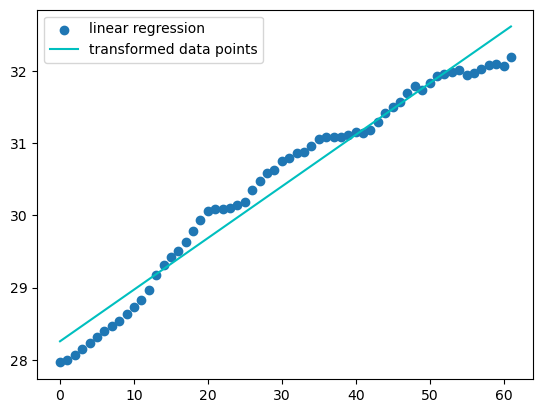

In [3]:
import statsmodels.api as sm
y = gdp_data['log_gdp']
x = gdp_data.time
x1 = sm.add_constant(x,prepend=False)
poly = sm.OLS(y,x1).fit()
y1 = poly.predict()
plt.scatter(x,y)
plt.plot(y1,'c')
plt.legend(['linear regression', 'transformed data points'])
display(poly.summary())

sst = sum((y-np.mean(y))**2)
ssr = sum((y1-np.mean(y))**2)
R2 = ssr/sst
print('R-squared: ', R2)

In [4]:
residuals= y - y1
MEAN = np.mean(residuals)
STANDERD_DEVIATION = np.std(residuals)
print("Mean is:",MEAN)
print("STD is:",STANDERD_DEVIATION)

Mean is: -8.251464028181809e-15
STD is: 0.24107101576840828


In [5]:
from scipy import stats
s, pval = stats.kstest(residuals, stats.norm.rvs(size= len(residuals),loc = 0, scale= STANDERD_DEVIATION))
print('P_value =',pval)
if pval< 0.01:
    print('Can reject the null hypothesis that the residuals are sampled from a normal distribution')
else:
    print('Cannot reject the null hypothesis that the residuals are sampled from a normal distribution, so Hypothesis accepted and can say that the residuals are sampled from a normal distribution')

P_value = 0.39806645355934955
Cannot reject the null hypothesis that the residuals are sampled from a normal distribution, so Hypothesis accepted and can say that the residuals are sampled from a normal distribution


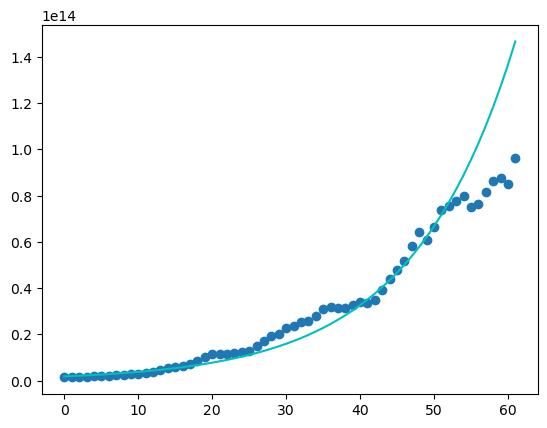

In [6]:
gdp_data['transformed'] = np.exp(y1)
fig = plt.figure()
plt.plot(x,gdp_data['transformed'],'c')
plt.scatter(x, gdp_data['NY.GDP.MKTP.CD'])
plt.show()

The relationship between the slope of the regression and the long-term growth rate of the
world GDP is,

Slope = log(r+1)

In [7]:
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)

[ 0.07154059 28.25540416]


In [8]:
slope = 0.0715
r = np.exp(slope) - 1
print('Long-term growth rate of the world GDP =',r)

Long-term growth rate of the world GDP = 0.07411815070131378


From 2015 we can observe from the dataset and plots that gdp has been increasing rapidly.

## Question 2

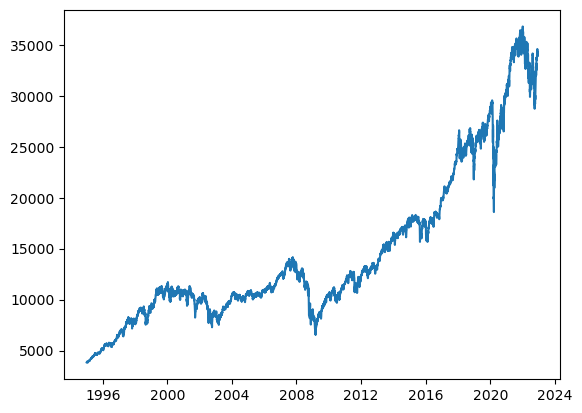

In [9]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
data = web.DataReader('^DJI' , 'yahoo' , start='1995-01-01' , end='2022-12-05')
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()
plt.plot(dates , dow)
plt.show()

In [10]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,1995-01-03,3845.199951,3827.709961,3834.399902,3838.479980,24440000,3838.479980
1,1995-01-04,3857.989990,3831.070068,3838.500000,3857.649902,27220000,3857.649902
2,1995-01-05,3860.679932,3843.189941,3857.600098,3850.919922,25810000,3850.919922
3,1995-01-06,3887.260010,3841.840088,3850.899902,3867.409912,30240000,3867.409912
4,1995-01-09,3874.479980,3853.280029,3867.399902,3861.350098,20820000,3861.350098
...,...,...,...,...,...,...,...
7027,2022-11-29,33933.910156,33662.449219,33847.800781,33852.531250,279750000,33852.531250
7028,2022-11-30,34589.769531,33583.769531,33795.429688,34589.769531,524440000,34589.769531
7029,2022-12-01,34595.511719,34129.351562,34533.589844,34395.011719,348720000,34395.011719
7030,2022-12-02,34483.210938,34039.730469,34265.449219,34429.878906,290580000,34429.878906


This is Lag: 1


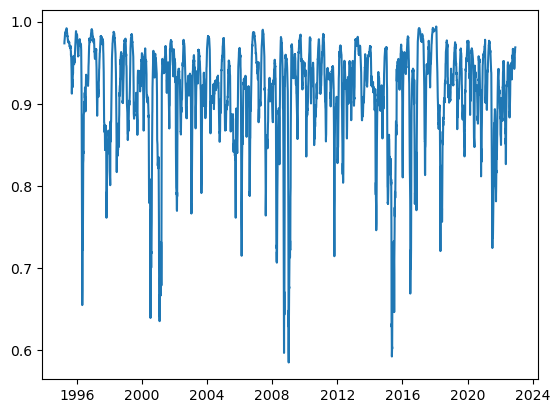

This is Lag: 2


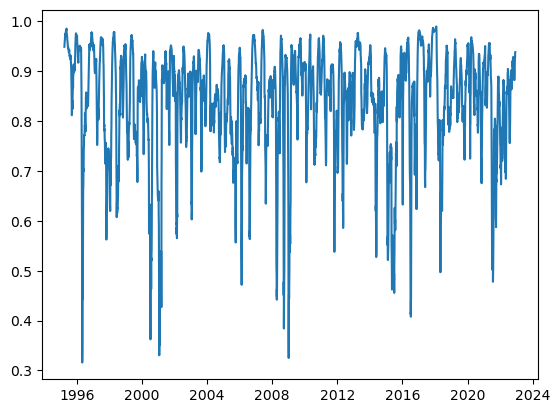

This is Lag: 3


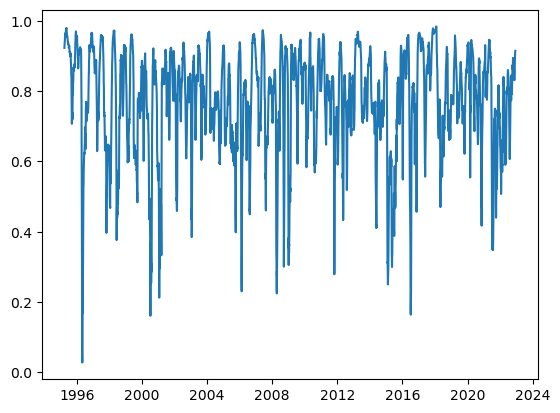

This is Lag: 5


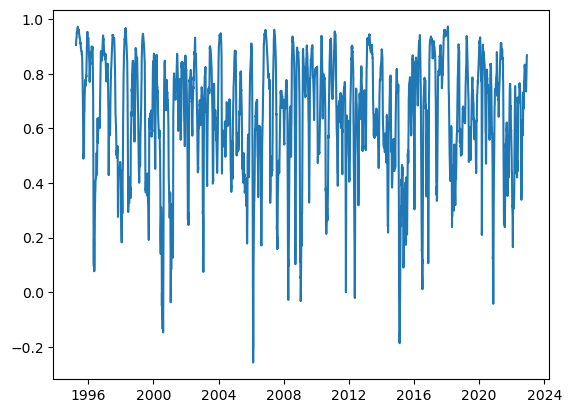

This is Lag: 10


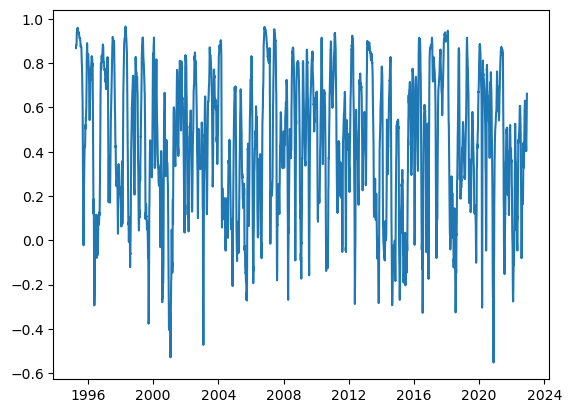

This is Lag: 15


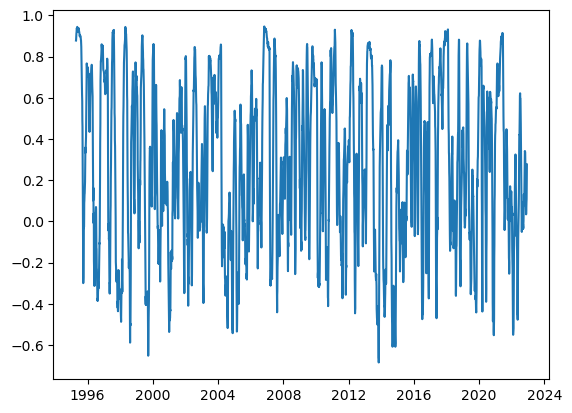

This is Lag: 20


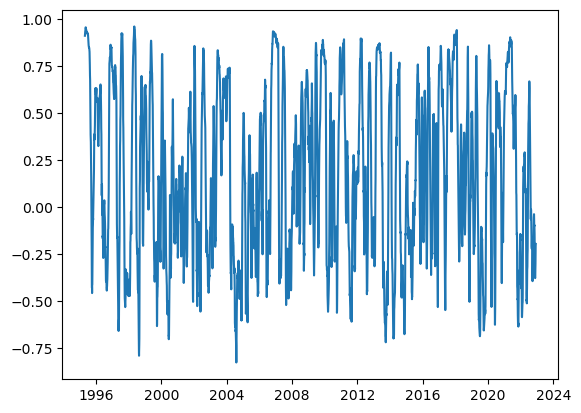

This is Lag: 30


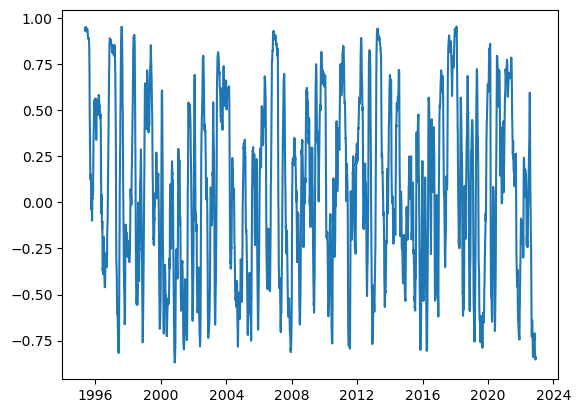

In [11]:
lags=[1,2,3,5,10,15,20,30]
average = []
for lag in lags:
    print("This is Lag:",lag)
    ac = data['Close'].rolling(60).corr(data['Close'].shift(lag))
    average.insert(len(average),np.mean(ac))
    plt.plot(dates,ac)
    plt.show()

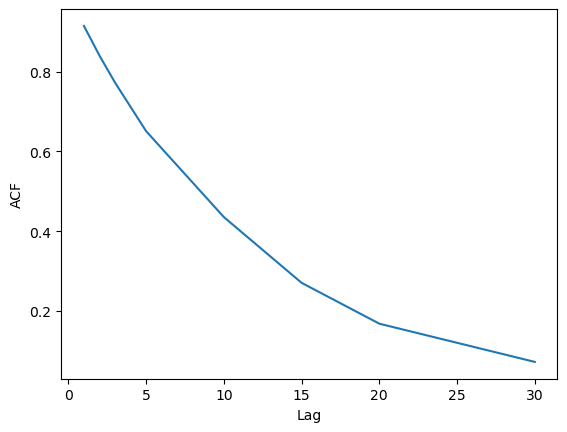

In [12]:
plt.plot(lags,average)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

The above plot suggests that as lag increases , auto correlation decreases which means both are dependent. While the mean of this plot is not 0. Hence, this is not a white noise process.

It can be more suitable is ARIMA model.

In [13]:
daily_returns = np.array([])

for i in range(0, 7032):
  dr = 100*((dow[i]/dow[i - 1]) - 1)
  daily_returns = np.append(daily_returns, dr)
  
Sneh = pd.DataFrame({'daily_returns': daily_returns})
print(Sneh)

      daily_returns
0        -88.692761
1          0.499414
2         -0.174458
3          0.428209
4         -0.156689
...             ...
7027       0.009070
7028       2.177794
7029      -0.563050
7030       0.101373
7031      -1.402205

[7032 rows x 1 columns]


This is Lag: 1


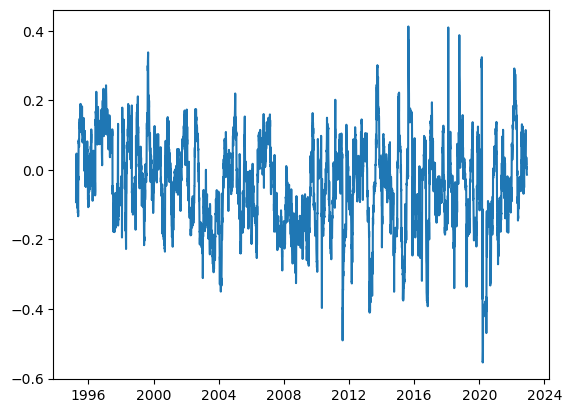

This is Lag: 2


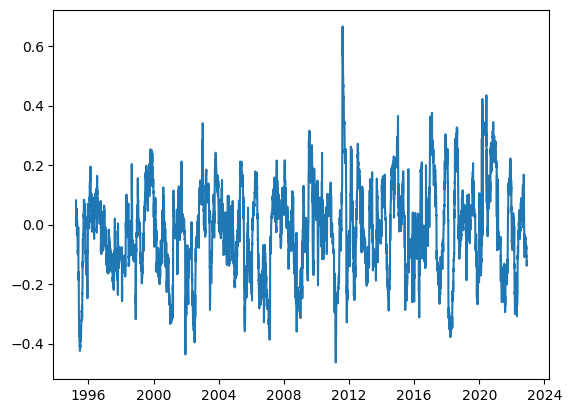

This is Lag: 3


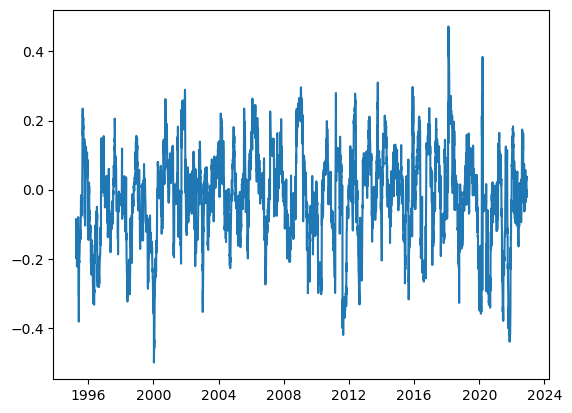

This is Lag: 5


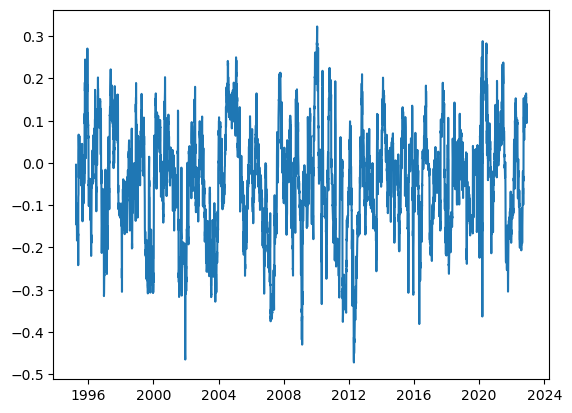

This is Lag: 10


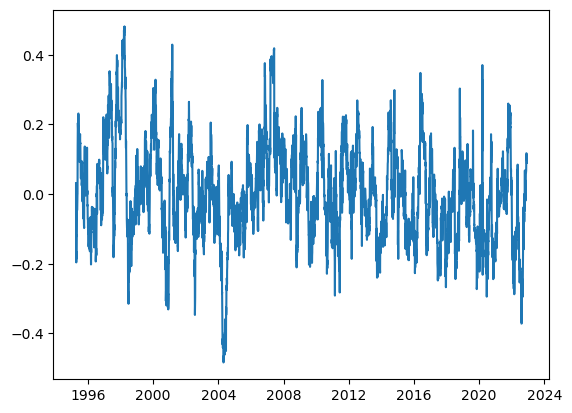

This is Lag: 15


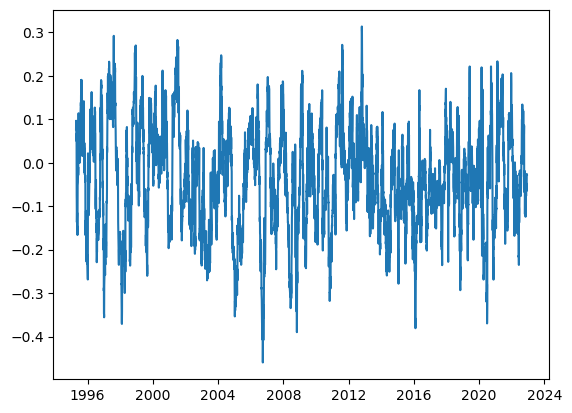

This is Lag: 20


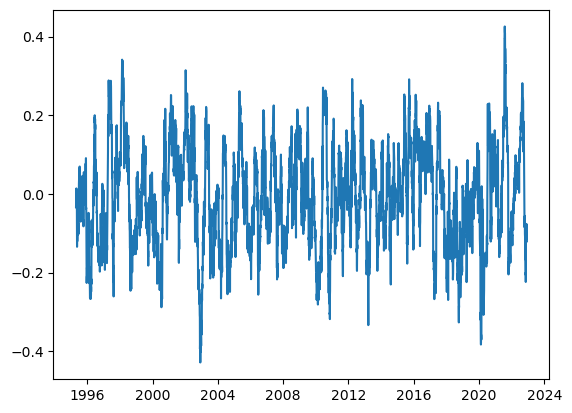

This is Lag: 30


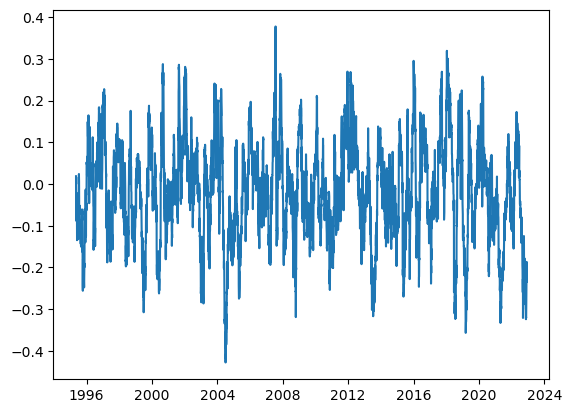

In [14]:
dr_avg = []
for lag in lags:
    print("This is Lag:",lag)
    dr_ac = Sneh['daily_returns'].rolling(60).corr(Sneh['daily_returns'].shift(lag))
    dr_avg.insert(len(dr_avg),np.mean(dr_ac))
    plt.plot(dates,dr_ac)
    plt.show()

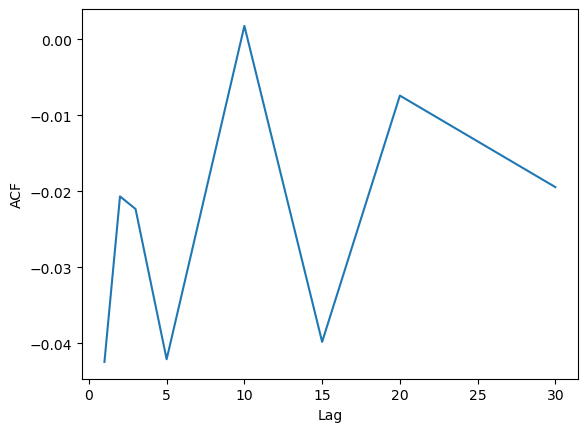

In [15]:
plt.plot(lags,dr_avg)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

The above plot suggests that both lag and auto correlation are independent to each other. This also has mean near to zero for most of the sample.

So it is a white noise process.